In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import *
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import plot_model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('/content/drive/MyDrive/LAU/Fall-2022/IEA/Projects/Project 2/csv3/ann1.csv')

# Split dataset with 75% training data and 25% test data
train_data, test_data = train_test_split(data, test_size=0.25, random_state=1, shuffle=True)

# Split datasets into features and labels
x_train = train_data.drop('0', axis=1).to_numpy()
x_test = test_data.drop('0', axis=1).to_numpy()
y_train = train_data['0'].to_numpy()
y_test = test_data['0'].to_numpy()


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print('Values before rescaling: ', np.unique(x_train))

#Feature Scaling
scaler = MinMaxScaler()
x_train =scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

print('Values after rescaling: ', np.unique(x_train))

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

x_train = np.reshape(x_train, (-1, 666)).astype('float32')
x_test = np.reshape(x_test, (-1, 666)).astype('float32')

(2388, 666)
(796, 666)
(2388,)
(796,)
Values before rescaling:  [    0     1     2 ... 36718 36719 36720]
Values after rescaling:  [0.00000000e+00 2.72331155e-05 2.74891418e-05 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


1) Model 1 --> 9

In [ ]:
model1 = Sequential()
model1.add(Dense(units=62,input_shape=(666,),activation='softmax'))
model1.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',metrics='accuracy')
hist1 = model1.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=20, batch_size=10)

Epoch 1/20
239/239 [==============================] - 1s 3ms/step - loss: 3.6283 - accuracy: 0.1537 - val_loss: 3.0802 - val_accuracy: 0.3241
Epoch 2/20
239/239 [==============================] - 1s 3ms/step - loss: 2.6493 - accuracy: 0.4640 - val_loss: 2.3724 - val_accuracy: 0.5377
Epoch 3/20
239/239 [==============================] - 1s 3ms/step - loss: 2.0820 - accuracy: 0.5959 - val_loss: 1.9972 - val_accuracy: 0.5905
Epoch 4/20
239/239 [==============================] - 1s 3ms/step - loss: 1.7372 - accuracy: 0.6520 - val_loss: 1.7208 - val_accuracy: 0.6357
Epoch 5/20
239/239 [==============================] - 1s 3ms/step - loss: 1.5119 - accuracy: 0.6872 - val_loss: 1.5667 - val_accuracy: 0.6432
Epoch 6/20
239/239 [==============================] - 1s 3ms/step - loss: 1.3592 - accuracy: 0.7123 - val_loss: 1.4464 - val_accuracy: 0.6709
Epoch 7/20
239/239 [==============================] - 1s 3ms/step - loss: 1.2457 - accuracy: 0.7316 - val_loss: 1.3515 - val_accuracy: 0.6935
Epoch 

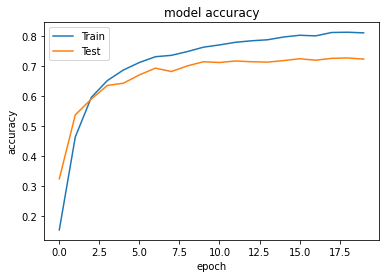

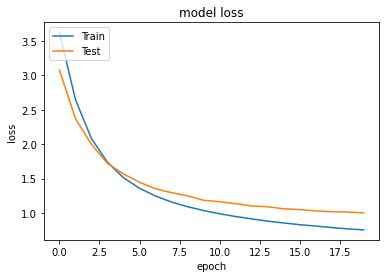

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [ ]:
model2 = Sequential()
model2.add(Dense(units=256,input_shape=(666,),activation='relu'))
model2.add(Dense(units=62,activation='softmax'))
model2.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',metrics='accuracy')
hist2 = model2.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=20, batch_size=10)

Epoch 1/20
239/239 [==============================] - 1s 4ms/step - loss: 3.5194 - accuracy: 0.1993 - val_loss: 2.8987 - val_accuracy: 0.4133
Epoch 2/20
239/239 [==============================] - 1s 3ms/step - loss: 2.3502 - accuracy: 0.5050 - val_loss: 2.0288 - val_accuracy: 0.5666
Epoch 3/20
239/239 [==============================] - 1s 3ms/step - loss: 1.6546 - accuracy: 0.6223 - val_loss: 1.5575 - val_accuracy: 0.6244
Epoch 4/20
239/239 [==============================] - 1s 3ms/step - loss: 1.2934 - accuracy: 0.6847 - val_loss: 1.3299 - val_accuracy: 0.6671
Epoch 5/20
239/239 [==============================] - 1s 3ms/step - loss: 1.0945 - accuracy: 0.7090 - val_loss: 1.1668 - val_accuracy: 0.7010
Epoch 6/20
239/239 [==============================] - 1s 3ms/step - loss: 0.9581 - accuracy: 0.7525 - val_loss: 1.1043 - val_accuracy: 0.7023
Epoch 7/20
239/239 [==============================] - 1s 3ms/step - loss: 0.8745 - accuracy: 0.7647 - val_loss: 1.0567 - val_accuracy: 0.7123
Epoch 

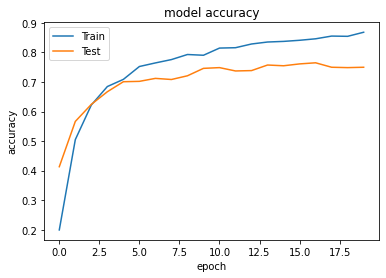

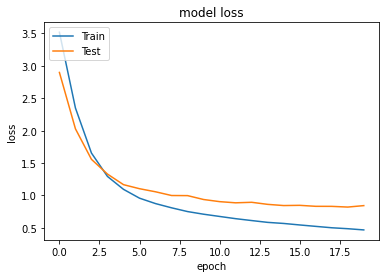

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [ ]:
model3 = Sequential()
model3.add(Dense(units=256,input_shape=(666,),activation='relu'))
model3.add(Dense(units=256,activation='relu'))
model3.add(Dense(units=62,activation='softmax'))
model3.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',metrics='accuracy')
hist3 = model3.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=20, batch_size=10)

Epoch 1/20
239/239 [==============================] - 1s 4ms/step - loss: 3.7396 - accuracy: 0.1503 - val_loss: 3.2176 - val_accuracy: 0.2726
Epoch 2/20
239/239 [==============================] - 1s 3ms/step - loss: 2.5572 - accuracy: 0.4267 - val_loss: 2.0632 - val_accuracy: 0.4786
Epoch 3/20
239/239 [==============================] - 1s 5ms/step - loss: 1.6419 - accuracy: 0.5934 - val_loss: 1.4634 - val_accuracy: 0.6206
Epoch 4/20
239/239 [==============================] - 1s 3ms/step - loss: 1.2288 - accuracy: 0.6487 - val_loss: 1.2351 - val_accuracy: 0.6470
Epoch 5/20
239/239 [==============================] - 1s 3ms/step - loss: 1.0174 - accuracy: 0.7006 - val_loss: 1.0721 - val_accuracy: 0.7123
Epoch 6/20
239/239 [==============================] - 1s 3ms/step - loss: 0.8901 - accuracy: 0.7337 - val_loss: 1.0210 - val_accuracy: 0.7211
Epoch 7/20
239/239 [==============================] - 1s 4ms/step - loss: 0.8105 - accuracy: 0.7559 - val_loss: 0.9833 - val_accuracy: 0.7173
Epoch 

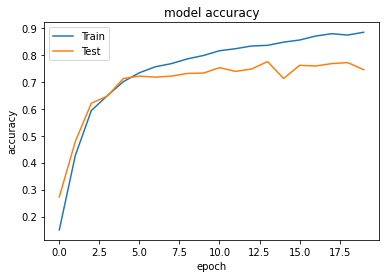

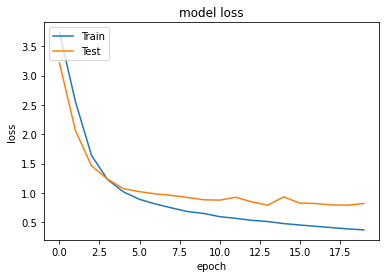

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist3.history['accuracy'])
plt.plot(hist3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [ ]:
model4 = Sequential()
model4.add(Dense(units=256,input_shape=(666,),activation='relu'))
model1.add(Dense(units=256,activation='relu'))
model1.add(Dense(units=256,activation='relu'))
model4.add(Dense(units=62,activation='softmax'))
model4.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',metrics='accuracy')
hist4 = model4.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=20, batch_size=10)

Epoch 1/20
239/239 [==============================] - 1s 4ms/step - loss: 3.6407 - accuracy: 0.1683 - val_loss: 3.0196 - val_accuracy: 0.3681
Epoch 2/20
239/239 [==============================] - 1s 3ms/step - loss: 2.4835 - accuracy: 0.4849 - val_loss: 2.0527 - val_accuracy: 0.5917
Epoch 3/20
239/239 [==============================] - 1s 3ms/step - loss: 1.7086 - accuracy: 0.6160 - val_loss: 1.5825 - val_accuracy: 0.6244
Epoch 4/20
239/239 [==============================] - 1s 3ms/step - loss: 1.3136 - accuracy: 0.6847 - val_loss: 1.3120 - val_accuracy: 0.6608
Epoch 5/20
239/239 [==============================] - 1s 3ms/step - loss: 1.0964 - accuracy: 0.7157 - val_loss: 1.1767 - val_accuracy: 0.6985
Epoch 6/20
239/239 [==============================] - 1s 3ms/step - loss: 0.9694 - accuracy: 0.7446 - val_loss: 1.0767 - val_accuracy: 0.7173
Epoch 7/20
239/239 [==============================] - 1s 3ms/step - loss: 0.8727 - accuracy: 0.7634 - val_loss: 1.0168 - val_accuracy: 0.7236
Epoch 

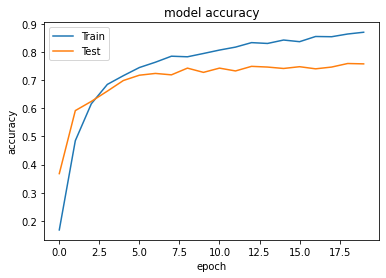

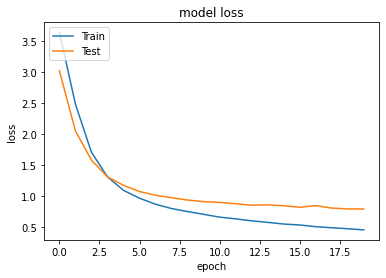

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist4.history['accuracy'])
plt.plot(hist4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist4.history['loss'])
plt.plot(hist4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [4]:
model5 = Sequential()
model5.add(Dense(units=256,input_shape=(666,),activation='relu'))
model5.add(Dense(units=256,activation='relu'))
model5.add(Dense(units=256,activation='relu'))
model5.add(Dense(units=62,activation='softmax'))
model5.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
hist5 = model5.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=20, batch_size=10)

Epoch 1/20
239/239 [==============================] - 4s 4ms/step - loss: 2.4348 - accuracy: 0.3534 - val_loss: 1.3960 - val_accuracy: 0.5791
Epoch 2/20
239/239 [==============================] - 1s 3ms/step - loss: 1.1137 - accuracy: 0.6411 - val_loss: 1.1193 - val_accuracy: 0.6533
Epoch 3/20
239/239 [==============================] - 1s 3ms/step - loss: 0.8411 - accuracy: 0.7207 - val_loss: 1.0154 - val_accuracy: 0.6897
Epoch 4/20
239/239 [==============================] - 1s 3ms/step - loss: 0.6661 - accuracy: 0.7651 - val_loss: 0.9578 - val_accuracy: 0.7048
Epoch 5/20
239/239 [==============================] - 1s 4ms/step - loss: 0.5673 - accuracy: 0.8036 - val_loss: 0.9046 - val_accuracy: 0.7450
Epoch 6/20
239/239 [==============================] - 1s 3ms/step - loss: 0.4963 - accuracy: 0.8266 - val_loss: 0.9466 - val_accuracy: 0.7362
Epoch 7/20
239/239 [==============================] - 1s 3ms/step - loss: 0.4432 - accuracy: 0.8417 - val_loss: 0.7983 - val_accuracy: 0.7563
Epoch 

In [5]:
model5.save('/content/drive/MyDrive/LAU/Fall-2022/IEA/Projects/Project 2/MLP/model5.h5')

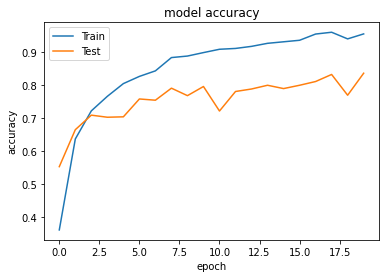

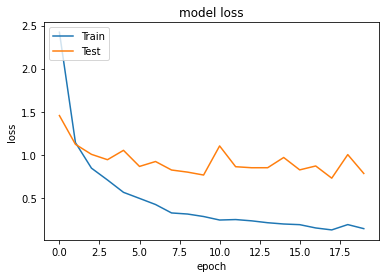

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist5.history['accuracy'])
plt.plot(hist5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist5.history['loss'])
plt.plot(hist5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [ ]:
model6 = Sequential()
model6.add(Dense(units=256,input_shape=(666,),activation='relu'))
model6.add(Dense(units=256,activation='relu'))
model6.add(Dense(units=256,activation='relu'))
model6.add(Dense(units=256,activation='relu'))
model6.add(Dense(units=62,activation='softmax'))
model6.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
hist6 = model6.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=20, batch_size=10)

Epoch 1/20
239/239 [==============================] - 2s 6ms/step - loss: 2.5957 - accuracy: 0.3149 - val_loss: 1.6950 - val_accuracy: 0.4573
Epoch 2/20
239/239 [==============================] - 1s 5ms/step - loss: 1.2307 - accuracy: 0.6147 - val_loss: 1.2270 - val_accuracy: 0.6357
Epoch 3/20
239/239 [==============================] - 1s 4ms/step - loss: 0.9628 - accuracy: 0.6662 - val_loss: 1.1225 - val_accuracy: 0.6671
Epoch 4/20
239/239 [==============================] - 1s 4ms/step - loss: 0.7927 - accuracy: 0.7198 - val_loss: 1.0649 - val_accuracy: 0.6997
Epoch 5/20
239/239 [==============================] - 1s 4ms/step - loss: 0.6460 - accuracy: 0.7642 - val_loss: 1.0506 - val_accuracy: 0.6784
Epoch 6/20
239/239 [==============================] - 1s 3ms/step - loss: 0.5549 - accuracy: 0.7990 - val_loss: 1.0306 - val_accuracy: 0.6985
Epoch 7/20
239/239 [==============================] - 1s 5ms/step - loss: 0.4960 - accuracy: 0.8191 - val_loss: 1.2255 - val_accuracy: 0.6671
Epoch 

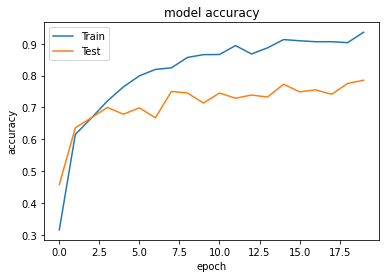

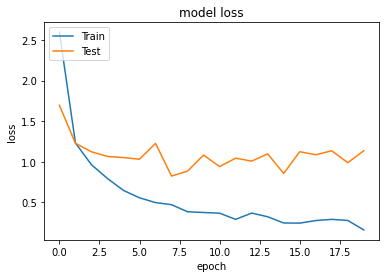

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist6.history['accuracy'])
plt.plot(hist6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist6.history['loss'])
plt.plot(hist6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

WE realized that adding more layer is not affecting accuracy anymore

In [ ]:
model7 = Sequential()
model7.add(Dense(units=256,input_shape=(666,),activation='relu'))
model7.add(Dense(units=256,activation='relu'))
model7.add(Dense(units=256,activation='tanh'))
model7.add(Dense(units=62,activation='softmax'))
model7.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
hist7 = model7.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=20, batch_size=10)

Epoch 1/20
239/239 [==============================] - 2s 4ms/step - loss: 2.2186 - accuracy: 0.4079 - val_loss: 1.3339 - val_accuracy: 0.6055
Epoch 2/20
239/239 [==============================] - 1s 4ms/step - loss: 1.0225 - accuracy: 0.6809 - val_loss: 1.0389 - val_accuracy: 0.7023
Epoch 3/20
239/239 [==============================] - 1s 3ms/step - loss: 0.7704 - accuracy: 0.7404 - val_loss: 0.9465 - val_accuracy: 0.6922
Epoch 4/20
239/239 [==============================] - 1s 3ms/step - loss: 0.6206 - accuracy: 0.7793 - val_loss: 0.8018 - val_accuracy: 0.7588
Epoch 5/20
239/239 [==============================] - 1s 4ms/step - loss: 0.5061 - accuracy: 0.8212 - val_loss: 0.8799 - val_accuracy: 0.7337
Epoch 6/20
239/239 [==============================] - 1s 3ms/step - loss: 0.4127 - accuracy: 0.8522 - val_loss: 0.9110 - val_accuracy: 0.7374
Epoch 7/20
239/239 [==============================] - 1s 3ms/step - loss: 0.3598 - accuracy: 0.8601 - val_loss: 0.8687 - val_accuracy: 0.7224
Epoch 

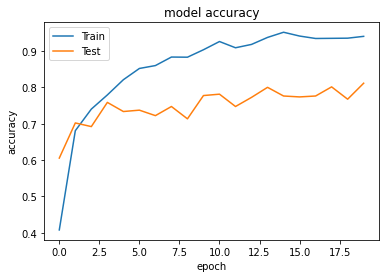

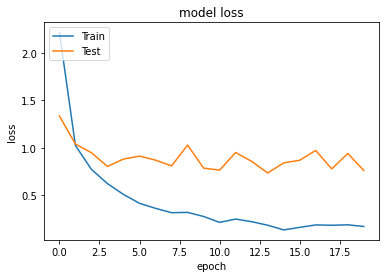

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist7.history['accuracy'])
plt.plot(hist7.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist7.history['loss'])
plt.plot(hist7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [6]:
model8 = Sequential()
model8.add(Dense(units=256,input_shape=(666,),activation='relu'))
model8.add(Dense(units=256,activation='relu'))
model8.add(Dense(units=256,activation='tanh'))
model8.add(BatchNormalization())
model8.add(Dense(units=62,activation='softmax'))
model8.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
hist8= model8.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=20, batch_size=10)

Epoch 1/20
239/239 [==============================] - 2s 4ms/step - loss: 1.8975 - accuracy: 0.5013 - val_loss: 1.7839 - val_accuracy: 0.4925
Epoch 2/20
239/239 [==============================] - 1s 4ms/step - loss: 1.0662 - accuracy: 0.6830 - val_loss: 1.2067 - val_accuracy: 0.6445
Epoch 3/20
239/239 [==============================] - 1s 4ms/step - loss: 0.8165 - accuracy: 0.7504 - val_loss: 1.2647 - val_accuracy: 0.6533
Epoch 4/20
239/239 [==============================] - 1s 4ms/step - loss: 0.6985 - accuracy: 0.7789 - val_loss: 1.0403 - val_accuracy: 0.6960
Epoch 5/20
239/239 [==============================] - 1s 4ms/step - loss: 0.5492 - accuracy: 0.8170 - val_loss: 0.9819 - val_accuracy: 0.7299
Epoch 6/20
239/239 [==============================] - 1s 4ms/step - loss: 0.4823 - accuracy: 0.8425 - val_loss: 0.9257 - val_accuracy: 0.7324
Epoch 7/20
239/239 [==============================] - 1s 5ms/step - loss: 0.3716 - accuracy: 0.8719 - val_loss: 0.8672 - val_accuracy: 0.7525
Epoch 

In [7]:
model8.save('/content/drive/MyDrive/LAU/Fall-2022/IEA/Projects/Project 2/MLP/model8.h5')

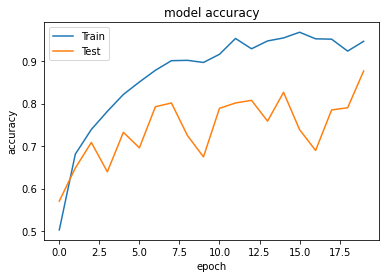

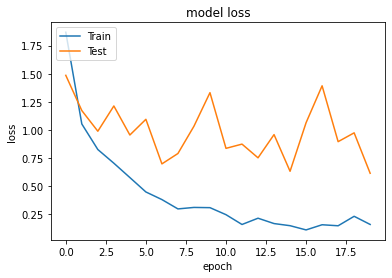

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist8.history['accuracy'])
plt.plot(hist8.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist8.history['loss'])
plt.plot(hist8.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [8]:
model9 = Sequential()
model9.add(Dense(units=256,input_shape=(666,),activation='relu'))
model9.add(Dense(units=256,activation='relu'))
model9.add(BatchNormalization())
model9.add(Dense(units=256,activation='relu'))
model9.add(BatchNormalization())
model9.add(Dense(units=62,activation='softmax'))
model9.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
hist9= model9.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=20, batch_size=10)

Epoch 1/20
239/239 [==============================] - 2s 5ms/step - loss: 2.1428 - accuracy: 0.4443 - val_loss: 1.7252 - val_accuracy: 0.5666
Epoch 2/20
239/239 [==============================] - 1s 5ms/step - loss: 1.2069 - accuracy: 0.6461 - val_loss: 1.5334 - val_accuracy: 0.6093
Epoch 3/20
239/239 [==============================] - 1s 4ms/step - loss: 1.0012 - accuracy: 0.7048 - val_loss: 1.3307 - val_accuracy: 0.6520
Epoch 4/20
239/239 [==============================] - 1s 4ms/step - loss: 0.8590 - accuracy: 0.7395 - val_loss: 1.4076 - val_accuracy: 0.6231
Epoch 5/20
239/239 [==============================] - 1s 4ms/step - loss: 0.7435 - accuracy: 0.7693 - val_loss: 0.9891 - val_accuracy: 0.7286
Epoch 6/20
239/239 [==============================] - 1s 4ms/step - loss: 0.6441 - accuracy: 0.7936 - val_loss: 0.8297 - val_accuracy: 0.7714
Epoch 7/20
239/239 [==============================] - 1s 5ms/step - loss: 0.5501 - accuracy: 0.8224 - val_loss: 0.7566 - val_accuracy: 0.7814
Epoch 

In [9]:
model9.save('/content/drive/MyDrive/LAU/Fall-2022/IEA/Projects/Project 2/MLP/model9.h5')

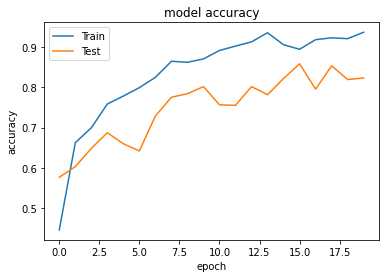

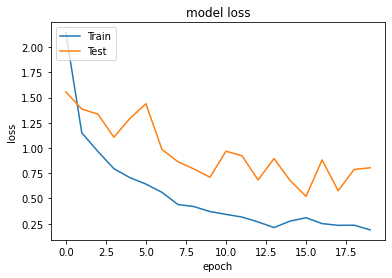

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist9.history['accuracy'])
plt.plot(hist9.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist9.history['loss'])
plt.plot(hist9.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()